In [45]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

Data Processing

In [46]:
coords = pd.read_csv('/home/capstone22/WildFIrePrediction/isaac_data/LatLon.csv')

In [47]:
#Create dataset file that will be used for training (2003-2013)
'''
df_train = pd.DataFrame()

for i in range(2003,2014):
    PATH = '/home/capstone22/WildFIrePrediction/isaac_data/Isaac_data_original/'
    CD_PATH = PATH + 'CD_' + str(i) + '_' + str(i) + '.csv'
    TD_PATH = PATH + 'TD_' + str(i) + '_' + str(i) + '.csv'
    
    df_temp = pd.read_csv(CD_PATH)
    df_temp = df_temp.loc[coords['pixel_id']]

    gt_temp = pd.read_csv(TD_PATH)
    gt_temp = gt_temp.loc[coords['pixel_id']]

    df_temp['value'] = gt_temp['value']

    df_train = df_train.append(df_temp)

#df_train = shuffle(df_train)

PATH = '/home/capstone22/WildFIrePrediction/isaac_data/processed_log_reg/'
df_train.to_csv(PATH + '2003_2013.csv')
'''

"\ndf_train = pd.DataFrame()\n\nfor i in range(2003,2014):\n    PATH = '/home/capstone22/WildFIrePrediction/isaac_data/Isaac_data_original/'\n    CD_PATH = PATH + 'CD_' + str(i) + '_' + str(i) + '.csv'\n    TD_PATH = PATH + 'TD_' + str(i) + '_' + str(i) + '.csv'\n    \n    df_temp = pd.read_csv(CD_PATH)\n    df_temp = df_temp.loc[coords['pixel_id']]\n\n    gt_temp = pd.read_csv(TD_PATH)\n    gt_temp = gt_temp.loc[coords['pixel_id']]\n\n    df_temp['value'] = gt_temp['value']\n\n    df_train = df_train.append(df_temp)\n\n#df_train = shuffle(df_train)\n\nPATH = '/home/capstone22/WildFIrePrediction/isaac_data/processed_log_reg/'\ndf_train.to_csv(PATH + '2003_2013.csv')\n"

In [48]:
'''
#Create dataset files that will be used for predictions (2014-2018)
for i in range(2014, 2018):
    PATH = '/home/capstone22/WildFIrePrediction/isaac_data/Isaac_data_original/'
    CD_PATH = PATH + 'CD_' + str(i) + '_' + str(i) + '.csv'
    TD_PATH = PATH + 'TD_' + str(i) + '_' + str(i) + '.csv'

    df = pd.read_csv(CD_PATH)
    gt = pd.read_csv(TD_PATH)

    df = df.loc[coords['pixel_id']]
    gt = gt.loc[coords['pixel_id']]

    df['value'] = gt['value']
    
    PATH = '/home/capstone22/WildFIrePrediction/isaac_data/processed_log_reg/'
    df.to_csv(PATH + str(i) + '.csv')

'''

"\n#Create dataset files that will be used for predictions (2014-2018)\nfor i in range(2014, 2018):\n    PATH = '/home/capstone22/WildFIrePrediction/isaac_data/Isaac_data_original/'\n    CD_PATH = PATH + 'CD_' + str(i) + '_' + str(i) + '.csv'\n    TD_PATH = PATH + 'TD_' + str(i) + '_' + str(i) + '.csv'\n\n    df = pd.read_csv(CD_PATH)\n    gt = pd.read_csv(TD_PATH)\n\n    df = df.loc[coords['pixel_id']]\n    gt = gt.loc[coords['pixel_id']]\n\n    df['value'] = gt['value']\n    \n    PATH = '/home/capstone22/WildFIrePrediction/isaac_data/processed_log_reg/'\n    df.to_csv(PATH + str(i) + '.csv')\n\n"

Data Loading

In [49]:
PATH = '/home/capstone22/WildFIrePrediction/isaac_data/processed_log_reg/'

df_train = pd.read_csv(PATH + '2003_2013.csv')

dataframes = []
groundTruth = []

for i in range(2014,2018):
    df = pd.read_csv(PATH + str(i) + '.csv')
    dataframes.append(df)
    groundTruth.append(df['value'])

df_train.info

Feature Selection

In [ ]:
'''
selected_features = ['Road_Dist',
                    'Elec_Dist',
                    'Cultivated_Prop',
                    'aet__maximum_Normal',
                    'aet__mean_Normal',
                    'aet__minimum_Normal',
                    'cwd__maximum_Normal',
                    'cwd__mean_Normal',
                    'cwd__minimum_Normal',
                    'pck__maximum_Normal',
                    'pck__mean_Normal',
                    'pck__minimum_Normal',
                    'aet__mean_ThreeYear_Dev',
                    'cwd__mean_ThreeYear_Dev',
                    'Mean_Housing_Dens_25km',
                    'FFWI',
                    'time_since_fire']
'''

selected_features = [
                    'Elec_Dist',
                    'Cultivated_Prop',
                    'aet__mean_Normal',
                    'cwd__mean_Normal',
                    'aet__mean_ThreeYear_Dev',
                    'cwd__mean_ThreeYear_Dev',
                    'FFWI',
                    'time_since_fire'
                    ]



Model

In [ ]:
X_train = df_train[selected_features]
y_train = df_train['value']

X_train.info

<bound method DataFrame.info of          Elec_Dist  Cultivated_Prop  aet__mean_Normal  cwd__mean_Normal  \
0         8.602325         0.000000         38.176156         41.034380   
1         8.062258         0.000000         34.646541         44.249051   
2         7.615773         0.000000         44.356060         34.800088   
3         7.280110         0.000000         49.081118         32.195130   
4         7.071068         0.000000         53.763373         29.433720   
...            ...              ...               ...               ...   
4515902   4.472136         0.014888          7.925339        100.378858   
4515903   4.123106         0.009844          3.686596        103.826028   
4515904   4.000000         0.005226          4.606663        102.411877   
4515905   4.000000         0.003966          4.864382        102.060957   
4515906   4.000000         0.000276          3.764706        103.340794   

         aet__mean_ThreeYear_Dev  cwd__mean_ThreeYear_Dev       FFW

Grid Search for Hyperparameter Tuning

In [ ]:
'''
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['lbfgs', 'sag', 'saga']}

grid_search = GridSearchCV(estimator=LogisticRegression(),
                           param_grid=param_grid,
                           cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(best_params)
print(best_score)
'''

"\nparam_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['lbfgs', 'sag', 'saga']}\n\ngrid_search = GridSearchCV(estimator=LogisticRegression(),\n                           param_grid=param_grid,\n                           cv=5)\ngrid_search.fit(X_train, y_train)\n\nbest_params = grid_search.best_params_\nbest_score = grid_search.best_score_\n\nprint(best_params)\nprint(best_score)\n"

In [ ]:
clf = LogisticRegression(C = 0.1, penalty = 'l2', solver='lbfgs', max_iter=500)
clf.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=500)

In [ ]:
predictions = []
avg_prob = np.zeros(len(dataframes[0]))

for df in dataframes:
    X = df[selected_features]
    pred = clf.predict(X)
    pred_prob = clf.predict_proba(X)
    pred_prob = np.clip(pred_prob, 0, 0.1)
    fire_prob = pred_prob[:, 1]
    avg_prob += fire_prob
    predictions.append(fire_prob)

avg_prob = avg_prob / 4

Output Results for Dynamic Map

In [ ]:
year = 2014

df = pd.DataFrame()
df['Latitude'] = coords['Latitude']
df['Longitude'] = coords['Longitude']

for i in range(len(predictions)):
    fire_prob_col = str(year) + '_fire_prob'
    df[fire_prob_col] = predictions[i]

    fire_value_col = str(year) + '_fire_value'
    df[fire_value_col] = groundTruth[i]

    year += 1

df.to_csv('/home/capstone22/WildFIrePrediction/isaac_data/processed_log_reg/results.csv')

Metrics (ROC, Coverage)

In [ ]:
def thresholding(y_prob, threshold = 0.03):
    #classifies fire probs over the threshold as 1
    result = np.copy(y_prob)
    for i, probability in enumerate(result):
        if probability >= threshold:
            result[i] = 1
        else:
            result[i] = 0
    return result

def coverage(y_true, y_pred):
    #counts number of intersecting points of fire cases between prediction and truth, then divides over total true points
    #intuitively: how much does the heatmap capture relative to the truth, ignoring false positives
    intersectingPoints = 0
    trueFires = 0
    for i in range(len(y_true)):
        if (y_true[i] == 1):
            trueFires += 1
            if (y_pred[i] == 1):
                intersectingPoints += 1
    return intersectingPoints/trueFires

def plot_roc_curve(y_true, y_pred):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

def metrics(y_true, y_pred, threshold):
    print('Fire Prob Threshold:', threshold)
    print('ROC-AUC score:', roc_auc_score(y_true, y_pred))
    plot_roc_curve(y_true, y_pred)
    print('Coverage:', coverage(y_true, y_pred), '\n')



Heatmap Construction + Metrics

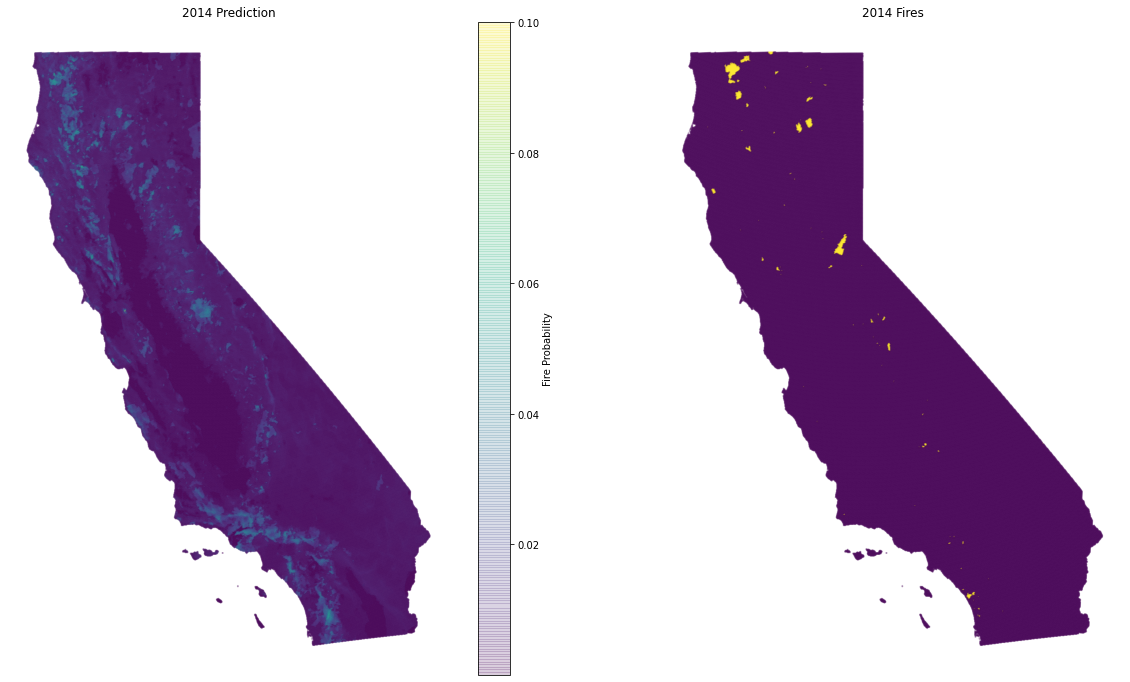

Fire Prob Threshold: 0.005
ROC-AUC score: 0.7098401341798206
Coverage: 0.8401486988847584 



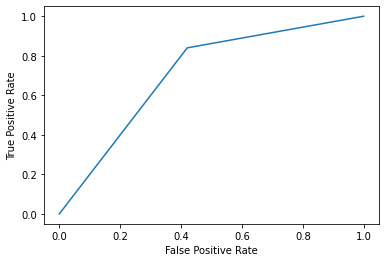

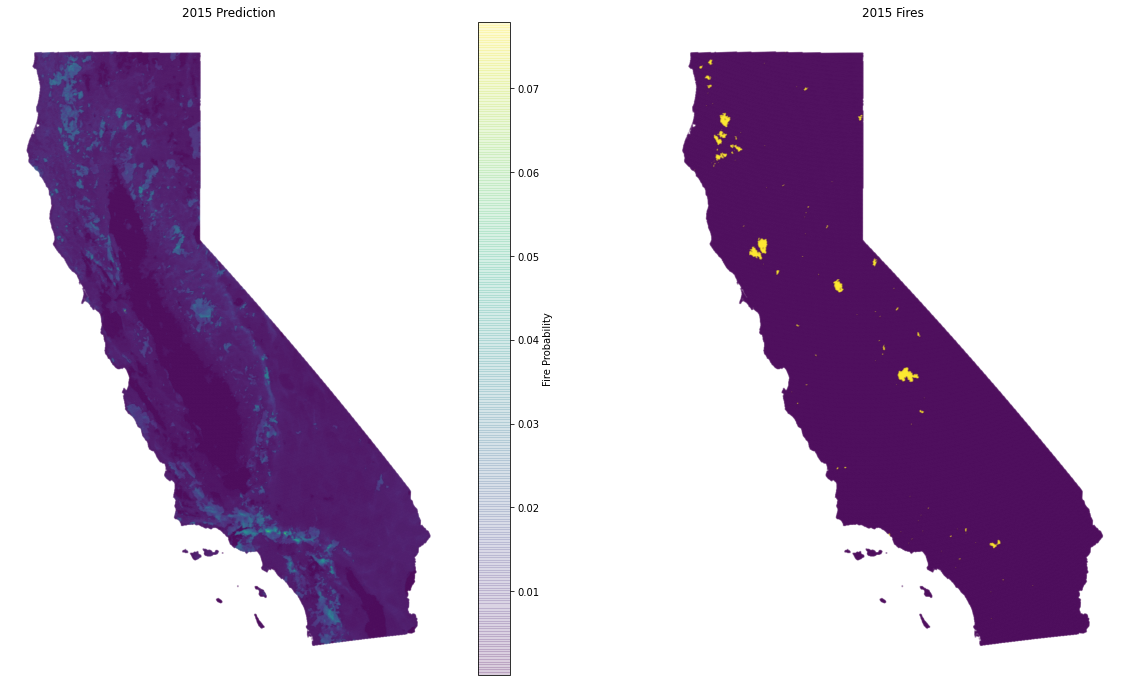

Fire Prob Threshold: 0.005
ROC-AUC score: 0.6953399183910248
Coverage: 0.7249607535321821 



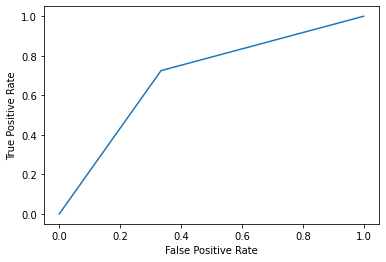

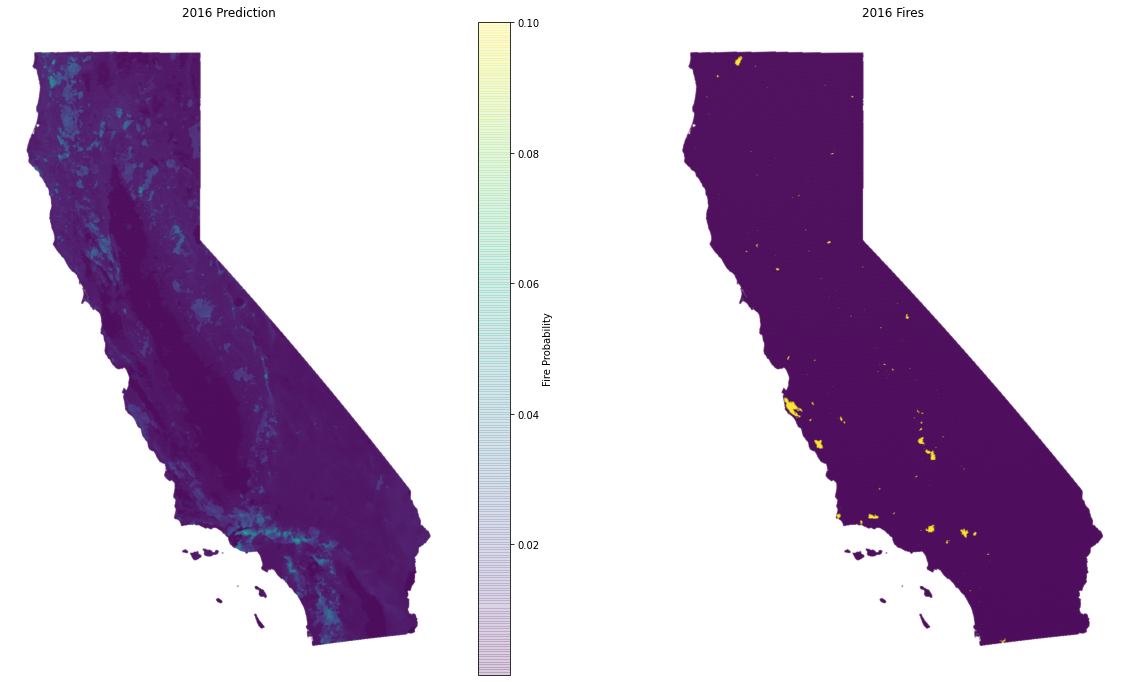

Fire Prob Threshold: 0.005
ROC-AUC score: 0.6907037762137189
Coverage: 0.751727314601566 



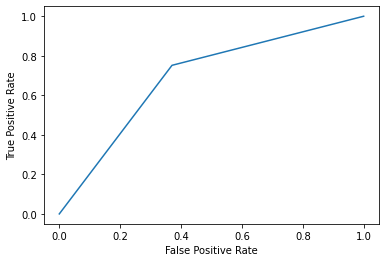

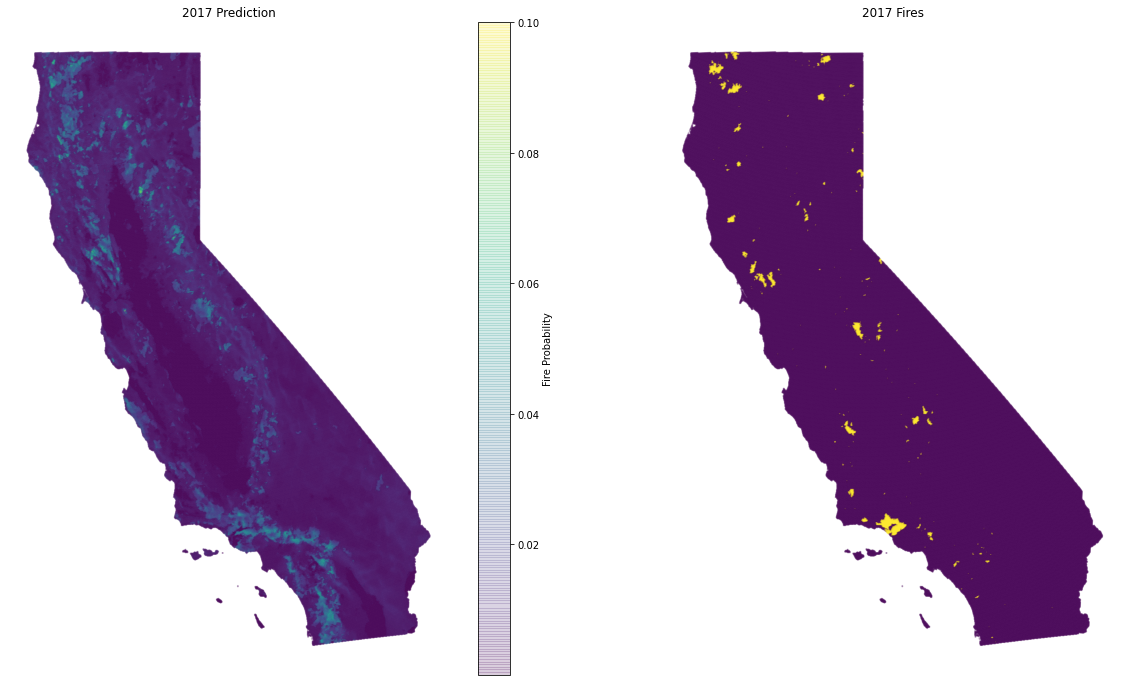

Fire Prob Threshold: 0.005
ROC-AUC score: 0.6334593562903704
Coverage: 0.7820158466924636 



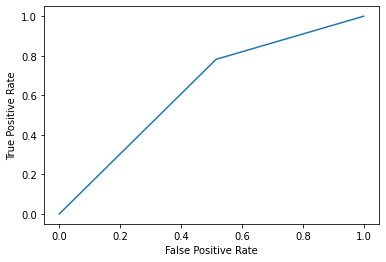

In [ ]:
year = 2014
for i in range(len(predictions)):
    year = 2014 + i

    fig, axs = plt.subplots(1,2, gridspec_kw={'width_ratios': [6,5]}, figsize = (20, 12))
    
    probHeatmap = axs[0].scatter(coords['Longitude'], coords['Latitude'], alpha = 0.2, s = 1, c = predictions[i])
    axs[0].set_title(str(year) + ' Prediction')
    axs[0].axis('off')

    truthHeatmap = axs[1].scatter(coords['Longitude'], coords['Latitude'], alpha = 0.2, s = 1, c = groundTruth[i])
    axs[1].set_title(str(year) + ' Fires')
    axs[1].axis('off')


    fig.colorbar(probHeatmap, ax = axs[0], label="Fire Probability", orientation="vertical")

    plt.show()

    thresholds = [0.005]

    for threshold in thresholds:
        y_pred_thresholded = thresholding(predictions[i], threshold)
        metrics(groundTruth[i], y_pred_thresholded, threshold)



Average Heatmap for 2014-2017

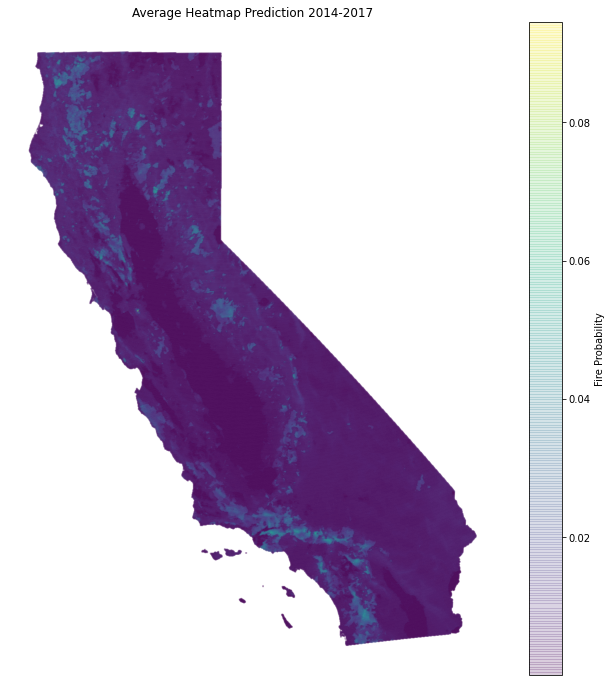

In [ ]:
plt.figure(figsize=(11,12))

plt.scatter(coords['Longitude'], coords['Latitude'], alpha = 0.2, s = 1, c = avg_prob)
plt.title('Average Heatmap Prediction 2014-2017')
plt.axis('off')

plt.colorbar(label="Fire Probability", orientation="vertical")

plt.show()